### Pronóstico de la vinculación laboral al mercado formal de recién graduados de pregrado en Colombia
### Autor: Deifilia Jiménez Silva
### Fecha: Diciembre de 2023

In [2]:
import pandas as pd
import os
import plotly.express as px
from matplotlib import pyplot
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from tabulate import tabulate
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split  #dividir los datos en entrenamiento y de test
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline #
from sklearn.preprocessing import OneHotEncoder  #para trabajar variable categoricas para ser consumidas por el algoritmo
from sklearn.impute import SimpleImputer  #imputar valores faltantes

###Metricas
from sklearn.model_selection import GridSearchCV  #para validación cruzada, analizar la estabilidad del algoritmo y obtener los mejores hiperparametros para realizar la predicción 
from sklearn import metrics  #para la evaluación
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

###Modelos
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor ## algoritmo a utilizar
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import ParameterGrid


## 1. CARGAR DATA

In [3]:
# Conjunto datos2
ruta_excel = 'C:/Users/deifi/Documents/Maestría Unir/Asignaturas/Trabajo fin de Master/DatosTFM/df_Conjunto1.xlsx'

# Carga el archivo Excel en un DataFrame de pandas
dataModelo = pd.read_excel(ruta_excel)

## 2. DESCRIPCIÓN DATASET

In [4]:
#cantidad de instancias(62461) y atributos(10)
print(dataModelo.shape)

(62461, 10)


In [5]:
#Visualización de los primeros instancias
print()
dataModelo.head()

,Region,Departamento,Sector,Institución,Acreditación,NivelFormación,CampoAmplio,Programa,Sexo,TasaCotizantes
0,Bogotá,11-Bogotá D.C.,Oficial,Escuela Superior de Administración Pública - ESAP,IES no acreditada,Tecnológico,Administración de Empresas y Derecho,TECNOLOGIA EN GESTION PUBLICA AMBIENTAL,Hombre,75.000000
1,Bogotá,11-Bogotá D.C.,Oficial,Escuela Superior de Administración Pública - ESAP,IES no acreditada,Tecnológico,Administración de Empresas y Derecho,TECNOLOGIA EN GESTION PUBLICA AMBIENTAL,Mujer,37.500000
2,Bogotá,11-Bogotá D.C.,Oficial,Escuela Superior de Administración Pública - ESAP,IES no acreditada,Universitario,Administración de Empresas y Derecho,ADMINISTRACION PUBLICA,Hombre,75.294118
3,Bogotá,11-Bogotá D.C.,Oficial,Escuela Superior de Administración Pública - ESAP,IES no acreditada,Universitario,Administración de Empresas y Derecho,ADMINISTRACION PUBLICA,Mujer,83.050847
4,Bogotá,11-Bogotá D.C.,Oficial,Escuela Superior de Administración Pública - ESAP,IES no acreditada,Universitario,Administración de Empresas y Derecho,ADMINISTRACION PUBLICA TERRITORIAL,Hombre,76.712329


In [6]:
#tipo de dato de cada variable, para saber cuales son categoricas y cuales númericas. 
#categóricas:Región, Departamento,Sector, Institución,Acreditación IES, Nivel Académico, Nivel Formación, Campo Amplio, Programa,Sexo
#numéricas:Tasa de cotizantes, añoseguimiento,añogrado
#no hay nulos tienen la misma cantidad de registros

dataModelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62461 entries, 0 to 62460
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          62461 non-null  object 
 1   Departamento    62461 non-null  object 
 2   Sector          62461 non-null  object 
 3   Institución     62461 non-null  object 
 4   Acreditación    62461 non-null  object 
 5   NivelFormación  62461 non-null  object 
 6   CampoAmplio     62461 non-null  object 
 7   Programa        62461 non-null  object 
 8   Sexo            62461 non-null  object 
 9   TasaCotizantes  62461 non-null  float64
dtypes: float64(1), object(9)
memory usage: 4.8+ MB


### Variable Objetivo
La variable Tasa de cotizantes es la variable destino=target

>- PREDICCIÓN LA DE TASA DE VINCULACION DE ACUERDO Al SECTOR, IES, ACREDITACION IES, NIVEL DE FORMACIÓN, CAMPO AMPLIO, PROGRAMA Y SEXO DE LA PERSONA


In [7]:
dataModelo.TasaCotizantes.describe()

count    62461.000000
mean        72.280310
std         22.113476
min          1.098901
25%         56.944444
50%         75.000000
75%         91.176471
max        100.000000
Name: TasaCotizantes, dtype: float64

In [8]:
## 9 VARIABLES PREDICTORAS 1 OBJETIVO
##Variable >Objetivo TasaCotizantes: Tasa de vinculaciónlaboral al mercado formal de la economía. 
##Variable continua por eso trabajaré Regresión

In [9]:
listado_variables=['TasaCotizantes','Region','Departamento','Sector','Institución','Acreditación','NivelFormación','CampoAmplio','Programa','Sexo']


In [10]:
dataModelo=dataModelo.reindex(columns=listado_variables)

In [11]:
dataModelo.head()

,TasaCotizantes,Region,Departamento,Sector,Institución,Acreditación,NivelFormación,CampoAmplio,Programa,Sexo
0,75.000000,Bogotá,11-Bogotá D.C.,Oficial,Escuela Superior de Administración Pública - ESAP,IES no acreditada,Tecnológico,Administración de Empresas y Derecho,TECNOLOGIA EN GESTION PUBLICA AMBIENTAL,Hombre
1,37.500000,Bogotá,11-Bogotá D.C.,Oficial,Escuela Superior de Administración Pública - ESAP,IES no acreditada,Tecnológico,Administración de Empresas y Derecho,TECNOLOGIA EN GESTION PUBLICA AMBIENTAL,Mujer
2,75.294118,Bogotá,11-Bogotá D.C.,Oficial,Escuela Superior de Administración Pública - ESAP,IES no acreditada,Universitario,Administración de Empresas y Derecho,ADMINISTRACION PUBLICA,Hombre
3,83.050847,Bogotá,11-Bogotá D.C.,Oficial,Escuela Superior de Administración Pública - ESAP,IES no acreditada,Universitario,Administración de Empresas y Derecho,ADMINISTRACION PUBLICA,Mujer
4,76.712329,Bogotá,11-Bogotá D.C.,Oficial,Escuela Superior de Administración Pública - ESAP,IES no acreditada,Universitario,Administración de Empresas y Derecho,ADMINISTRACION PUBLICA TERRITORIAL,Hombre


### Identificar tipo de datos predictores

In [12]:
dataModelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62461 entries, 0 to 62460
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TasaCotizantes  62461 non-null  float64
 1   Region          62461 non-null  object 
 2   Departamento    62461 non-null  object 
 3   Sector          62461 non-null  object 
 4   Institución     62461 non-null  object 
 5   Acreditación    62461 non-null  object 
 6   NivelFormación  62461 non-null  object 
 7   CampoAmplio     62461 non-null  object 
 8   Programa        62461 non-null  object 
 9   Sexo            62461 non-null  object 
dtypes: float64(1), object(9)
memory usage: 4.8+ MB


## Preprocesamiento de datos Columns Transformer de sckit-learn

In [13]:
categorical_features = ['Region','Departamento','Sector','Institución','Acreditación','NivelFormación','CampoAmplio','Programa','Sexo']

numeric_features = []

In [14]:
y=dataModelo.loc[:,'TasaCotizantes']# variable objetivo
X = dataModelo.iloc[:, 1:]#predictores

In [15]:
#print(X)

In [16]:
#print (y)

In [17]:
# Crear transformadores para variables categóricas y numéricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='sinInformacion')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))  # Puedes cambiar 'mean' por otra estrategia de imputación
])


In [18]:
# Crear un preprocesador que aplique transformadores según el tipo de variable
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

## División del dataset en datos de entrenamiento y datos de test 

In [19]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#stratify=y garantiza que la proporción de clases en y_train e y_test sea similar a la proporción en y. Esto es crucial cuando hay desbalance en las clases
##no se puede utilizar porque la case objeto hay programas con un dato

In [20]:
print('Cantidad de datos entrenamiento: ',X_train.shape,y_train.shape)
print('Cantidad de datos pruebas: ', X_test.shape, y_test.shape )

Cantidad de datos entrenamiento:  (43722, 9) (43722,)
Cantidad de datos pruebas:  (18739, 9) (18739,)


# 1. Aplicación de k-NN Regresión con Scikit-Learn

SIN APLICAR PESOS

In [21]:
# Crear el modelo k-NN Regresión
knn_regressor = KNeighborsRegressor(n_neighbors=30)  # Puedes ajustar el número de vecinos según tu preferencia

# Crear el pipeline que incluye el preprocesador y el modelo
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', knn_regressor)])

In [22]:
## si aumento el n_neiggbors disminuye el rendimiento

In [23]:
# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)


La tasa de error de un modelo predictivo puede evaluarse aplicando varias métricas derivadas de funciones de perdida en ML y en estadística. El concepto básico de la evaluación de la precisión en el análisis de regresión consiste en comparar la variable objetivo con la predicha

In [24]:
# Evaluar el rendimiento del modelo 

## El RMSE se interpreta como el error típico de las predicciones del modelo

rfr_r2 = r2_score(y_test, y_pred)
print('coeficiente de determinación (R^2):', rfr_r2)

rfr_RSME=metrics.mean_squared_error(y_test,y_pred, squared=False)
print('La raiz del Error Cuadratico Medio (RMSE) es :',rfr_RSME)


# MAE (error absoluto medio)
mae = mean_absolute_error(y_test, y_pred)
print('error absoluto medio MAE:', mae)

# MAPE (porcentaje absoluto medio del error)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('porcentaje absoluto medio del error MAPE:', mape)

coeficiente de determinación (R^2): 0.29741939406315254
La raiz del Error Cuadratico Medio (RMSE) es : 18.54412057701409
error absoluto medio MAE: 14.713080470570128
porcentaje absoluto medio del error MAPE: 28.380287154603028


Los resultados del modelo utilizando n_neighbors=5:
R2:0.2946
RMSE:18.58
Los resultados del modelo utilizando n_neighbors=20:
R2:0.3095
RMSE:18.5814.49

Mejora los resultados del modelo utilizando n_neighbors=10, aumenta el RSME
R2:0.3166 el modelo explica aproximadamente el 31% de la variedad de los datos de prueba. Lo deseable es un valor cercano a 1 mejor capacidad del modelo
RMSE:18.28 Indica magnitud promedio de los errores entrelas predicciones del modelo y los valores en los datos de prueba



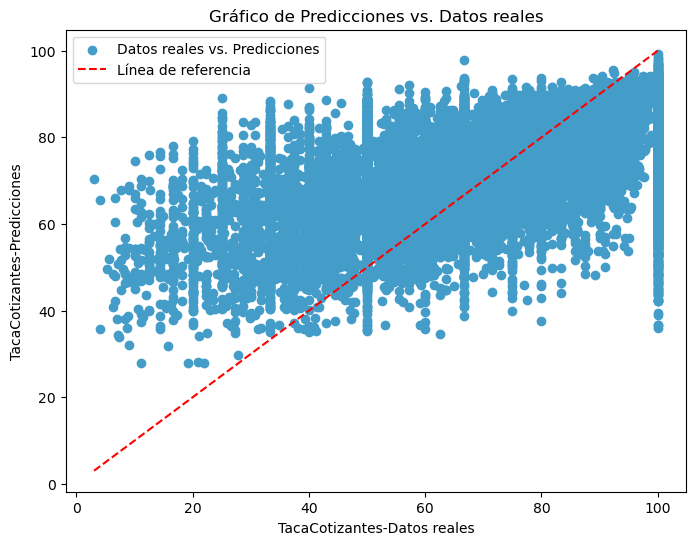

In [25]:
# Graficar el RMSE
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='#449CC8', label='Datos reales vs. Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Línea de referencia')
plt.title('Gráfico de Predicciones vs. Datos reales')
plt.xlabel('TacaCotizantes-Datos reales')
plt.ylabel('TacaCotizantes-Predicciones')
plt.legend()
plt.show()

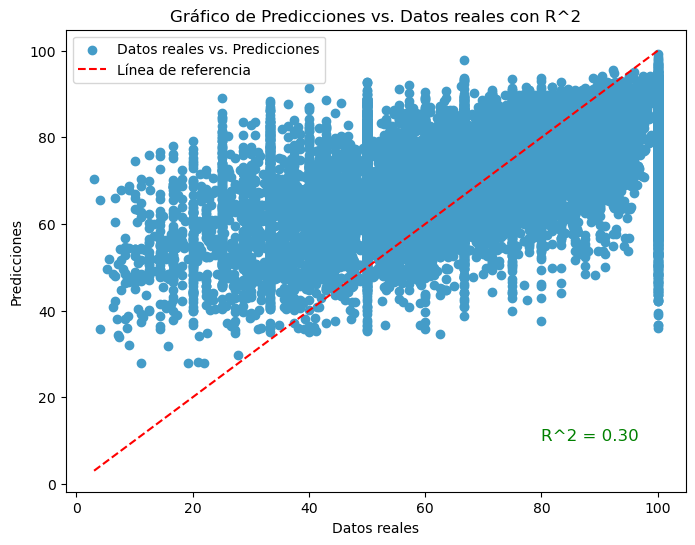

In [26]:
# Graficar el R^2
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='#449CC8', label='Datos reales vs. Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Línea de referencia')
plt.title('Gráfico de Predicciones vs. Datos reales con R^2')
plt.xlabel('Datos reales')
plt.ylabel('Predicciones')
plt.legend()

# Agregar texto con el valor de R^2
plt.text(0.8 * max(y_test), 0.1 * max(y_test), f'R^2 = {rfr_r2:.2f}', fontsize=12, color='green')

plt.show()

In [27]:
comparacion=pd.DataFrame(np.c_[y_test, y_pred],columns=['Test','Predict'])
display(comparacion)

,Test,Predict
0,78.947368,70.895707
1,83.823529,83.924530
2,66.666667,68.058879
3,83.333333,61.615780
4,92.857143,85.191924
...,...,...
18734,100.000000,77.679047
18735,67.741935,66.425411
18736,70.000000,77.283784
18737,100.000000,60.785361


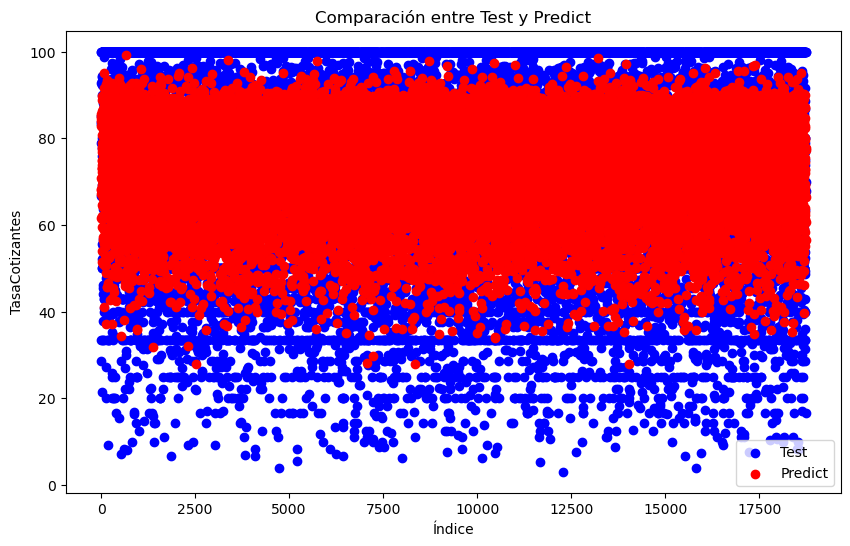

In [28]:
# Graficar la comparación
plt.figure(figsize=(10, 6))
plt.scatter(comparacion.index, comparacion['Test'], color='blue', label='Test')
plt.scatter(comparacion.index, comparacion['Predict'], color='red', label='Predict')
plt.xlabel('Índice')
plt.ylabel('TasaCotizantes')
plt.title('Comparación entre Test y Predict')
plt.legend()
plt.show()

Conclusión: Los resultados indican que la aplicación de pesos a las muestras no mejoró el rendimiento del modelo y, de hecho, empeoró significativamente. Un coeficiente de determinación (R^2) negativo y un RMSE elevado sugieren que el modelo no está capturando adecuadamente la variabilidad en los datos de prueba.
Coeficiente de determinación (R^2): -10.815751313948
Raíz del Error Cuadrático Medio (RMSE): 75.59995515443998

# 2. Regresión Lineal

In [29]:
# Crear el modelo de Regresión Lineal
regression_model = LinearRegression()

In [30]:
# Crear el pipeline con preprocesamiento y el modelo
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', regression_model)])

In [31]:
# Entrenar el modelo
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  []),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='sinInformacion',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Region', 'Departamento',
                                                   'Sector', 'Institución',
 

In [32]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)


In [33]:
# Evaluar el rendimiento del modelo
## El RMSE se interpreta como el error típico de las predicciones del modelo

rfr_r2 = r2_score(y_test, y_pred)
print('coeficiente de determinación (R^2):', rfr_r2)

rfr_RSME=metrics.mean_squared_error(y_test,y_pred, squared=False)
print('La raiz del Error Cuadratico Medio (RMSE) es :',rfr_RSME)


# MAE (error absoluto medio)
mae = mean_absolute_error(y_test, y_pred)
print('error absoluto medio MAE:', mae)

# MAPE (porcentaje absoluto medio del error)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('porcentaje absoluto medio del error MAPE:', mape)

coeficiente de determinación (R^2): 0.31322806404273695
La raiz del Error Cuadratico Medio (RMSE) es : 18.334304241336458
error absoluto medio MAE: 14.108804586114749
porcentaje absoluto medio del error MAPE: 26.506680287237966


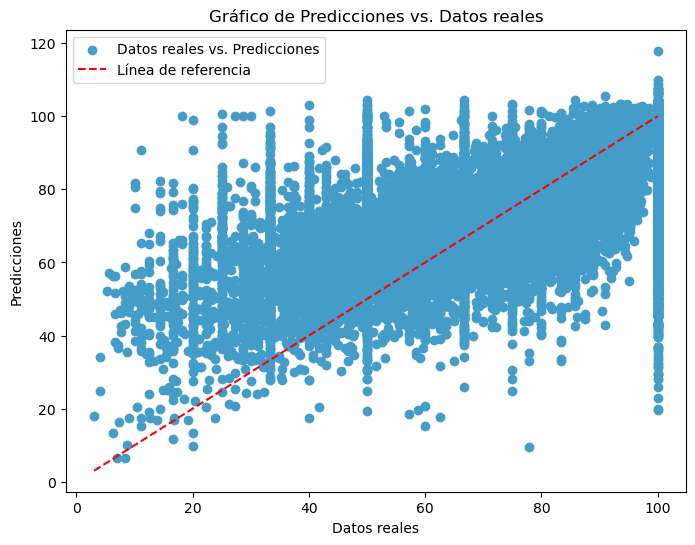

In [34]:
# Graficar el RMSE
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='#449CC8', label='Datos reales vs. Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Línea de referencia')
plt.title('Gráfico de Predicciones vs. Datos reales')
plt.xlabel('Datos reales')
plt.ylabel('Predicciones')
plt.legend()
plt.show()

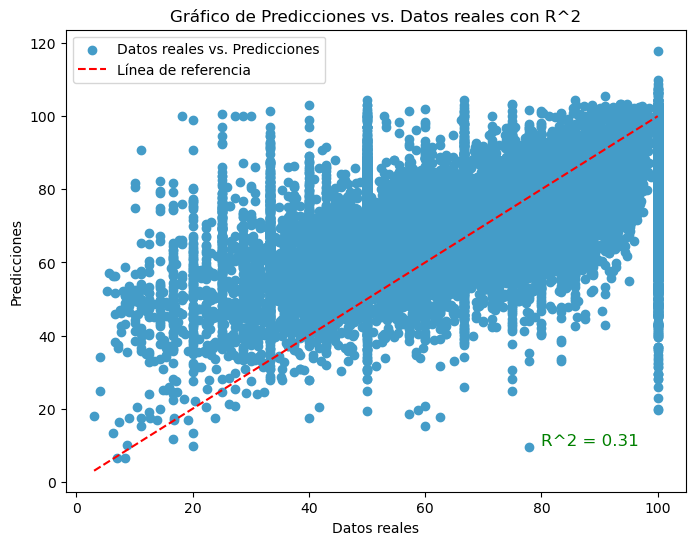

In [35]:
# Graficar el R^2
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='#449CC8', label='Datos reales vs. Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Línea de referencia')
plt.title('Gráfico de Predicciones vs. Datos reales con R^2')
plt.xlabel('Datos reales')
plt.ylabel('Predicciones')
plt.legend()

# Agregar texto con el valor de R^2
plt.text(0.8 * max(y_test), 0.1 * max(y_test), f'R^2 = {rfr_r2:.2f}', fontsize=12, color='green')

plt.show()

In [36]:
comparacion=pd.DataFrame(np.c_[y_test, y_pred],columns=['Test','Predict'])
display(comparacion)

,Test,Predict
0,78.947368,71.501353
1,83.823529,74.449719
2,66.666667,68.973376
3,83.333333,57.868273
4,92.857143,75.825178
...,...,...
18734,100.000000,98.463476
18735,67.741935,59.400880
18736,70.000000,72.976946
18737,100.000000,48.095406


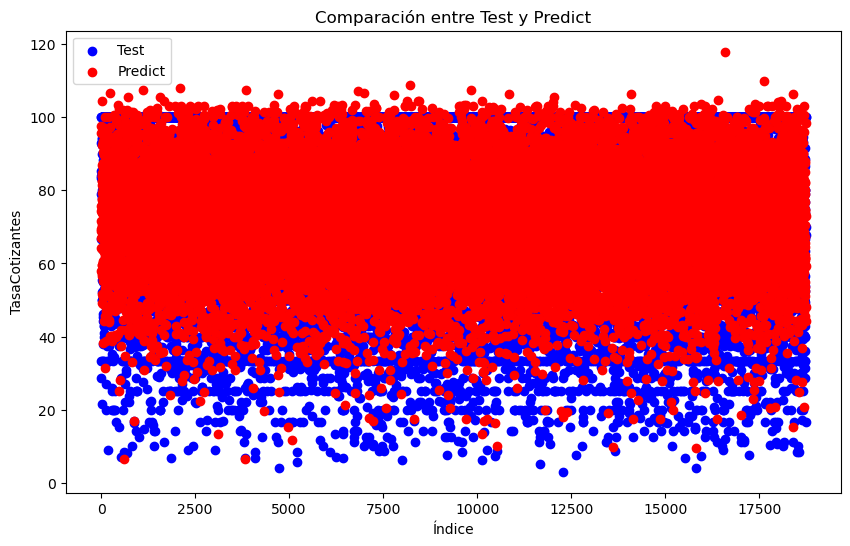

In [37]:
# Graficar la comparación
plt.figure(figsize=(10, 6))
plt.scatter(comparacion.index, comparacion['Test'], color='blue', label='Test')
plt.scatter(comparacion.index, comparacion['Predict'], color='red', label='Predict')
plt.xlabel('Índice')
plt.ylabel('TasaCotizantes')
plt.title('Comparación entre Test y Predict')
plt.legend()
plt.show()

# 3. Random Forest Regressor

In [38]:
# Crear el modelo Random Forest Regressor
model = RandomForestRegressor(n_estimators=300,
                              criterion='squared_error',
                              max_depth=16,
                              max_features='sqrt',
                              random_state=42)

In [39]:
# Crear el pipeline con el preprocesador y el modelo
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

In [40]:
# Entrenar el modelo
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  []),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='sinInformacion',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Region', 'Departamento',
                                                   'Sector', 'Institución',
 

In [41]:
# Hacer predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

In [42]:
# Evaluar el rendimiento del modelo 

## El RMSE se interpreta como el error típico de las predicciones del modelo

rfr_r2 = r2_score(y_test, y_pred)
print('coeficiente de determinación (R^2):', rfr_r2)

rfr_RSME=metrics.mean_squared_error(y_test,y_pred, squared=False)
print('La raiz del Error Cuadratico Medio (RMSE) es :',rfr_RSME)


# MAE (error absoluto medio)
mae = mean_absolute_error(y_test, y_pred)
print('error absoluto medio MAE:', mae)

# MAPE (porcentaje absoluto medio del error)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('porcentaje absoluto medio del error MAPE:', mape)

coeficiente de determinación (R^2): 0.1755670068780033
La raiz del Error Cuadratico Medio (RMSE) es : 20.087960493744728
error absoluto medio MAE: 16.58246985302625
porcentaje absoluto medio del error MAPE: 32.76132804692928


Es la diferencia del valor real con respecto a la predicción que realizamos. El error en el que estamos cayendo en la tasa de cotizantes es de 12.73% con 100 árboles y con 300 12.73% no hay mucha diferencia.Con un aumento en la cantidad de árboles, la precisión del modelo aumenta y se reduce el sobreajuste. Sin embargo, esto hace que el modelo sea más lento.

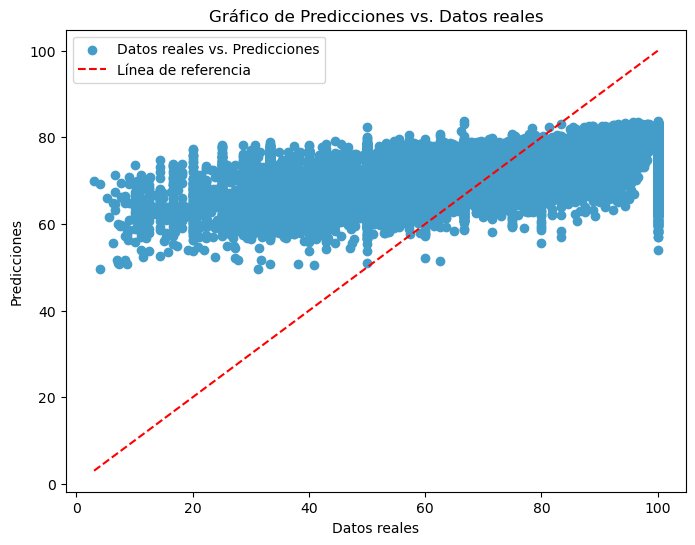

In [43]:
# Graficar el RMSE
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='#449CC8', label='Datos reales vs. Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Línea de referencia')
plt.title('Gráfico de Predicciones vs. Datos reales')
plt.xlabel('Datos reales')
plt.ylabel('Predicciones')
plt.legend()
plt.show()

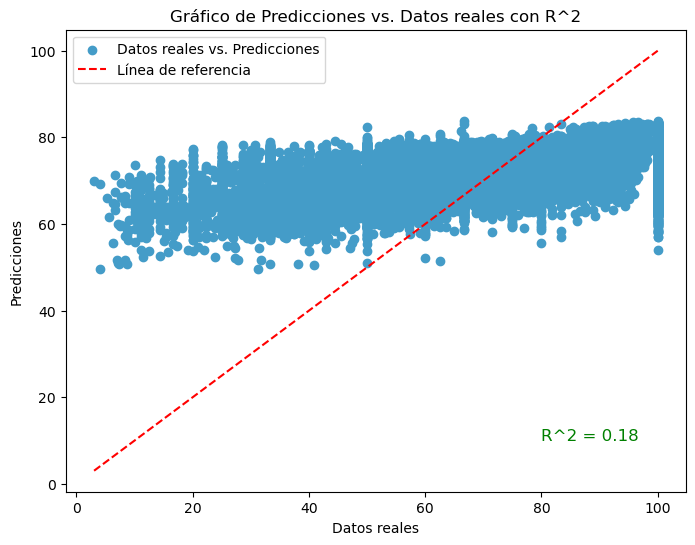

In [44]:
 #Graficar el R^2
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='#449CC8', label='Datos reales vs. Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Línea de referencia')
plt.title('Gráfico de Predicciones vs. Datos reales con R^2')
plt.xlabel('Datos reales')
plt.ylabel('Predicciones')
plt.legend()

# Agregar texto con el valor de R^2
plt.text(0.8 * max(y_test), 0.1 * max(y_test), f'R^2 = {rfr_r2:.2f}', fontsize=12, color='green')

plt.show()

In [45]:
comparacion=pd.DataFrame(np.c_[y_test, y_pred],columns=['Test','Predict'])
display(comparacion)

,Test,Predict
0,78.947368,76.735582
1,83.823529,78.075908
2,66.666667,69.212139
3,83.333333,71.971504
4,92.857143,77.124109
...,...,...
18734,100.000000,75.095108
18735,67.741935,70.647185
18736,70.000000,77.928112
18737,100.000000,66.524628


Test es el valor real(color azul) y el predic(color rojo) hace referencia a la predicción, en unos casos esta muy cercana mientras que otros está muy lejana

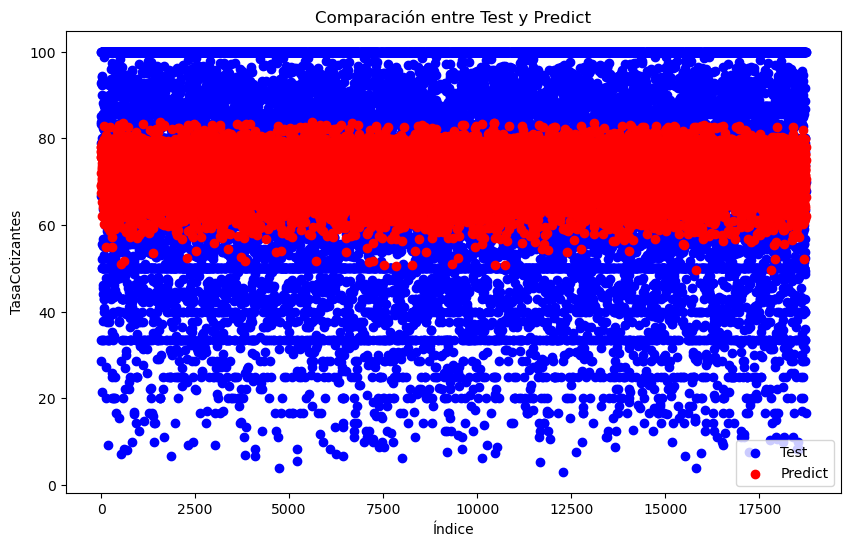

In [46]:
# Graficar la comparación
plt.figure(figsize=(10, 6))
plt.scatter(comparacion.index, comparacion['Test'], color='blue', label='Test')
plt.scatter(comparacion.index, comparacion['Predict'], color='red', label='Predict')
plt.xlabel('Índice')
plt.ylabel('TasaCotizantes')
plt.title('Comparación entre Test y Predict')
plt.legend()
plt.show()

# 4. Gradient Boosting Regressor

In [47]:
# Construir el modelo Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=3, random_state=42)

In [48]:
# Crear el pipeline que incluye el preprocesamiento y el modelo
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])


In [49]:
# Ajustar el modelo
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  []),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='sinInformacion',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Region', 'Departamento',
                                                   'Sector', 'Institución',
 

In [50]:
# Realizar predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

In [51]:
# Evaluar el rendimiento del modelo
rfr_r2 = r2_score(y_test, y_pred)
print('coeficiente de determinación (R^2):', rfr_r2)

rfr_RSME=metrics.mean_squared_error(y_test,y_pred, squared=False)
print('La raiz del Error Cuadratico Medio (RMSE) es :',rfr_RSME)


# MAE (error absoluto medio)
mae = mean_absolute_error(y_test, y_pred)
print('error absoluto medio MAE:', mae)

# MAPE (porcentaje absoluto medio del error)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('porcentaje absoluto medio del error MAPE:', mape)

coeficiente de determinación (R^2): 0.2833931047985455
La raiz del Error Cuadratico Medio (RMSE) es : 18.728312834722086
error absoluto medio MAE: 14.988157340236022
porcentaje absoluto medio del error MAPE: 29.10878581709624


Mejora un poco con n_estimators=300


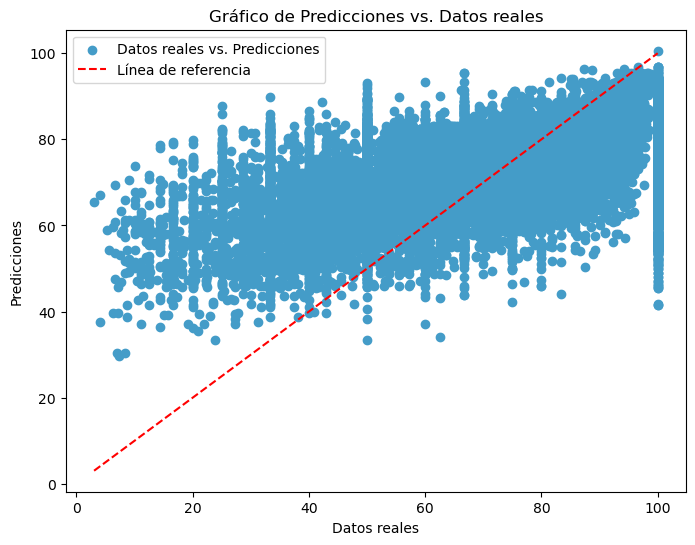

In [52]:
# Graficar el RMSE
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='#449CC8', label='Datos reales vs. Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Línea de referencia')
plt.title('Gráfico de Predicciones vs. Datos reales')
plt.xlabel('Datos reales')
plt.ylabel('Predicciones')
plt.legend()
plt.show()

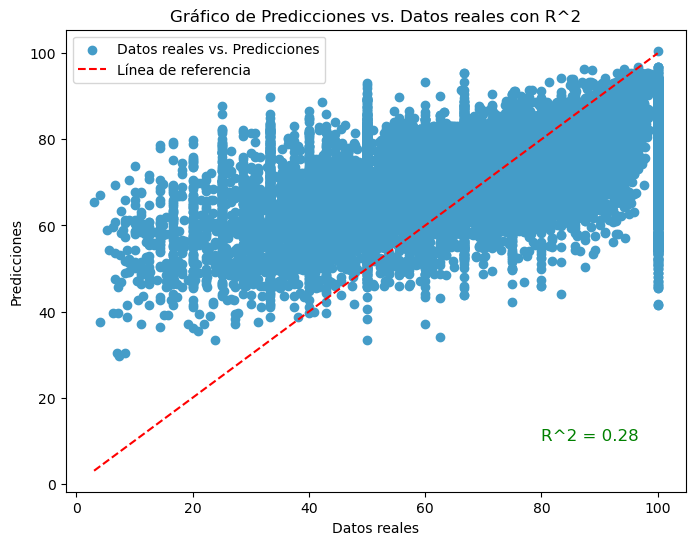

In [53]:
 #Graficar el R^2
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='#449CC8', label='Datos reales vs. Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Línea de referencia')
plt.title('Gráfico de Predicciones vs. Datos reales con R^2')
plt.xlabel('Datos reales')
plt.ylabel('Predicciones')
plt.legend()

# Agregar texto con el valor de R^2
plt.text(0.8 * max(y_test), 0.1 * max(y_test), f'R^2 = {rfr_r2:.2f}', fontsize=12, color='green')

plt.show()

In [54]:
comparacion=pd.DataFrame(np.c_[y_test, y_pred],columns=['Test','Predict'])
display(comparacion)

,Test,Predict
0,78.947368,75.974634
1,83.823529,81.495467
2,66.666667,63.702621
3,83.333333,65.920819
4,92.857143,76.203133
...,...,...
18734,100.000000,76.260390
18735,67.741935,67.211637
18736,70.000000,76.661594
18737,100.000000,54.560918


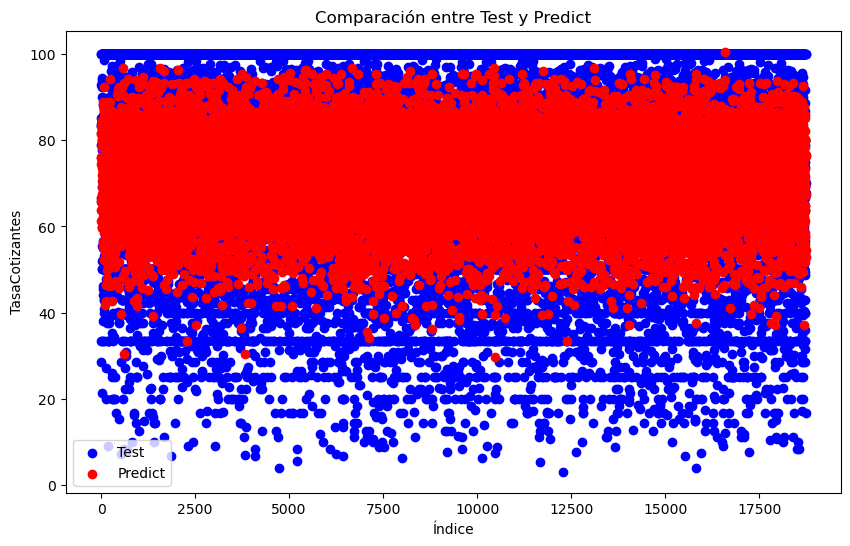

In [55]:
# Graficar la comparación
plt.figure(figsize=(10, 6))
plt.scatter(comparacion.index, comparacion['Test'], color='blue', label='Test')
plt.scatter(comparacion.index, comparacion['Predict'], color='red', label='Predict')
plt.xlabel('Índice')
plt.ylabel('TasaCotizantes')
plt.title('Comparación entre Test y Predict')
plt.legend()
plt.show()

## 5. Support Vector Regressor (SVR)

In [56]:
# Inicializar el modelo SVR
model = SVR(kernel='rbf')

In [57]:
# Crear el pipeline con el preprocesador y el modelo
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

In [58]:
# Entrenar el modelo
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  []),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='sinInformacion',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Region', 'Departamento',
                                                   'Sector', 'Institución',
 

In [59]:
# Realizar predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

coeficiente de determinación (R^2): 0.2934434904212502
La raiz del Error Cuadratico Medio (RMSE) es : 18.59651714262901
error absoluto medio MAE: 14.455725447169552
porcentaje absoluto medio del error MAPE: 28.4206415790808


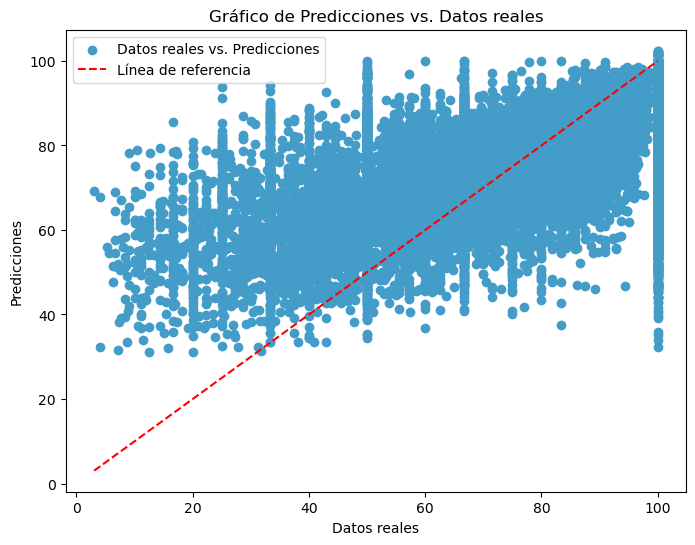

In [60]:
# Evaluar el rendimiento del modelo
rfr_r2 = r2_score(y_test, y_pred)
print('coeficiente de determinación (R^2):', rfr_r2)

rfr_RSME=metrics.mean_squared_error(y_test,y_pred, squared=False)
print('La raiz del Error Cuadratico Medio (RMSE) es :',rfr_RSME)


# MAE (error absoluto medio)
mae = mean_absolute_error(y_test, y_pred)
print('error absoluto medio MAE:', mae)

# MAPE (porcentaje absoluto medio del error)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('porcentaje absoluto medio del error MAPE:', mape)

# Graficar el RMSE
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='#449CC8', label='Datos reales vs. Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Línea de referencia')
plt.title('Gráfico de Predicciones vs. Datos reales')
plt.xlabel('Datos reales')
plt.ylabel('Predicciones')
plt.legend()
plt.show()


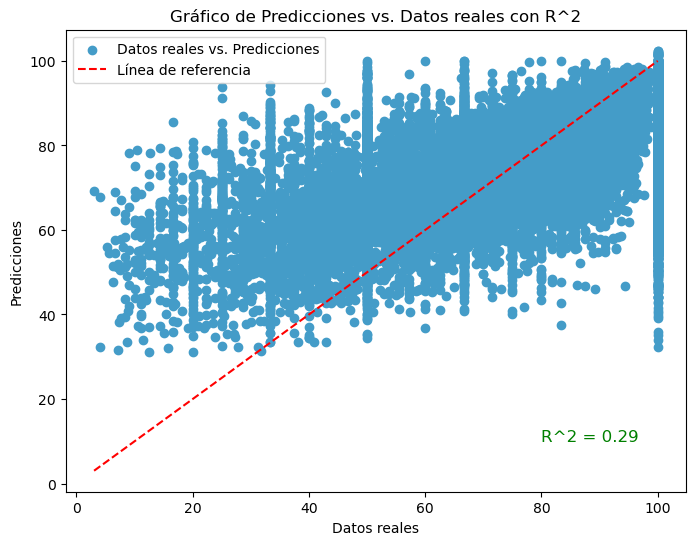

In [61]:
 #Graficar el R^2
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='#449CC8', label='Datos reales vs. Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Línea de referencia')
plt.title('Gráfico de Predicciones vs. Datos reales con R^2')
plt.xlabel('Datos reales')
plt.ylabel('Predicciones')
plt.legend()

# Agregar texto con el valor de R^2
plt.text(0.8 * max(y_test), 0.1 * max(y_test), f'R^2 = {rfr_r2:.2f}', fontsize=12, color='green')

plt.show()

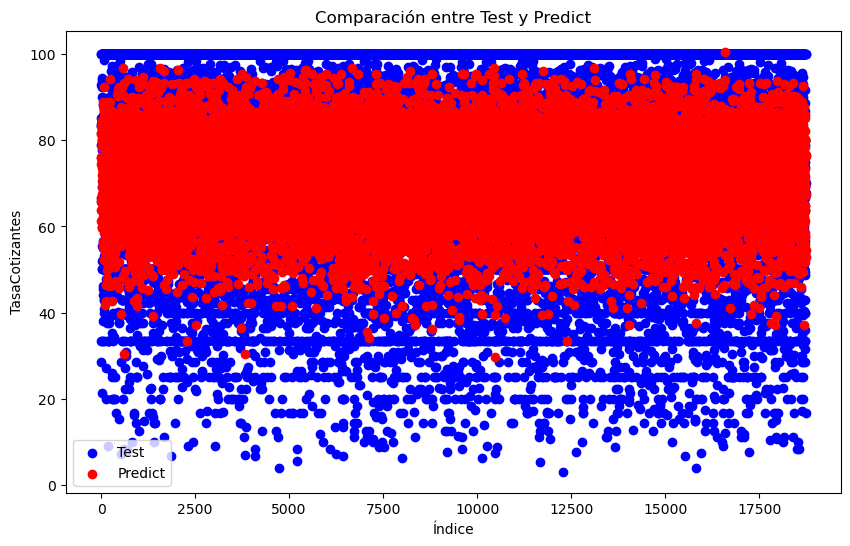

In [62]:
# Graficar la comparación
plt.figure(figsize=(10, 6))
plt.scatter(comparacion.index, comparacion['Test'], color='blue', label='Test')
plt.scatter(comparacion.index, comparacion['Predict'], color='red', label='Predict')
plt.xlabel('Índice')
plt.ylabel('TasaCotizantes')
plt.title('Comparación entre Test y Predict')
plt.legend()
plt.show()

# 6 Red Neuronal (Neural Network)

In [82]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir columnas que necesitan ser codificadas
categorical_cols = ['Region','Departamento','Sector','Institución','Acreditación','NivelFormación','CampoAmplio','Programa','Sexo']
numeric_cols = []



In [83]:
# Combina los conjuntos de entrenamiento y prueba antes de la transformación
X_combined = pd.concat([X_train, X_test])

In [84]:
# Crear transformadores para variables categóricas y numéricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='sinInformacion')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))  # Puedes cambiar 'mean' por otra estrategia de imputación
])

In [85]:
# Crear un transformador para aplicar codificación a columnas categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ])

In [86]:
# Aplica transformaciones al conjunto combinado
X_combined_preprocessed = preprocessor.fit_transform(X_combined)


In [87]:
# Separa de nuevo en conjuntos de entrenamiento y prueba
X_train_preprocessed = X_combined_preprocessed[:len(X_train)]
X_test_preprocessed = X_combined_preprocessed[len(X_train):]

In [88]:
# Convertir las matrices dispersas a densas
X_train_preprocessed_dense = X_train_preprocessed.toarray()
X_test_preprocessed_dense = X_test_preprocessed.toarray()


In [89]:
# Convertir los datos a tf.data.Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_preprocessed_dense, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_preprocessed_dense, y_test))



In [90]:
# Asegúrate de mezclar y repetir los datos (opcional, dependiendo de tus necesidades)
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(32).repeat()
test_dataset = test_dataset.batch(32)


In [91]:
# Inicializar el modelo de Red Neuronal
model = Sequential()

In [92]:

# Añadir capas a la red neuronal con la arquitectura óptima
architecture = 32
model.add(Dense(architecture, activation='relu', input_dim=X_train_preprocessed_dense.shape[1]))
model.add(Dense(1))  # Capa de salida para regresión

#Antes
#model.add(Dense(64, activation='relu', input_dim=X_train_preprocessed_dense.shape[1]))
#model.add(Dense(1))  # Capa de salida para regresión


In [93]:
# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')


In [94]:
# Dividir manualmente el conjunto de entrenamiento para tener un conjunto de validación
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_preprocessed_dense, y_train, test_size=0.3, random_state=42)


In [95]:
# Entrenar el modelo usando el objeto tf.data.Dataset
history = model.fit(
    train_dataset,
    epochs=100,
    steps_per_epoch=X_train_preprocessed_dense.shape[0] // 32,  # Número de lotes por época
    validation_data=test_dataset,
    validation_steps=len(X_test_preprocessed_dense) // 32  # Número de lotes de validación
)

Epoch 1/100
1561/1561 [==============================] - 10s 5ms/step - loss: 1551.1249 - val_loss: 455.2880
Epoch 2/100
1561/1561 [==============================] - 8s 5ms/step - loss: 396.5168 - val_loss: 358.7646
Epoch 3/100
1561/1561 [==============================] - 8s 5ms/step - loss: 343.4860 - val_loss: 339.0466
Epoch 4/100
1561/1561 [==============================] - 8s 5ms/step - loss: 327.6847 - val_loss: 331.0363
Epoch 5/100
1561/1561 [==============================] - 8s 5ms/step - loss: 318.1100 - val_loss: 327.3275
Epoch 6/100
1561/1561 [==============================] - 8s 5ms/step - loss: 310.8155 - val_loss: 324.1375
Epoch 7/100
1561/1561 [==============================] - 8s 5ms/step - loss: 305.6576 - val_loss: 322.7459
Epoch 8/100
1561/1561 [==============================] - 8s 5ms/step - loss: 301.4998 - val_loss: 321.6150
Epoch 9/100
1561/1561 [==============================] - 8s 5ms/step - loss: 297.6317 - val_loss: 321.0962
Epoch 10/100
1561/1561 [===========

Epoch 77/100
1561/1561 [==============================] - 8s 5ms/step - loss: 252.7706 - val_loss: 325.9854
Epoch 78/100
1561/1561 [==============================] - 8s 5ms/step - loss: 252.8730 - val_loss: 325.0733
Epoch 79/100
1561/1561 [==============================] - 8s 5ms/step - loss: 252.0991 - val_loss: 325.2358
Epoch 80/100
1561/1561 [==============================] - 8s 5ms/step - loss: 252.0709 - val_loss: 325.8910
Epoch 81/100
1561/1561 [==============================] - 9s 6ms/step - loss: 252.1484 - val_loss: 325.6444
Epoch 82/100
1561/1561 [==============================] - 8s 5ms/step - loss: 251.7063 - val_loss: 325.7854
Epoch 83/100
1561/1561 [==============================] - 8s 5ms/step - loss: 251.9707 - val_loss: 326.3022
Epoch 84/100
1561/1561 [==============================] - 8s 5ms/step - loss: 251.0690 - val_loss: 325.8739
Epoch 85/100
1561/1561 [==============================] - 8s 5ms/step - loss: 251.4480 - val_loss: 326.2672
Epoch 86/100
1561/1561 [====

In [96]:
##Si aumento las epochs, disminuye el rendimiento

In [97]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_preprocessed_dense).flatten()



391/391 [==============================] - 1s 3ms/step


In [98]:
# Evaluar el rendimiento del modelo

# Calcular métricas
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

mse = metrics.mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

mae = metrics.mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')


mape = metrics.mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Absolute Percentage Error (MAPE): {mape}')


R² Score: 0.3232851926948159
Mean Squared Error (MSE): 327.33120812640504
Mean Absolute Error (MAE): 13.577839085555489
Mean Absolute Percentage Error (MAPE): 0.250709871101654


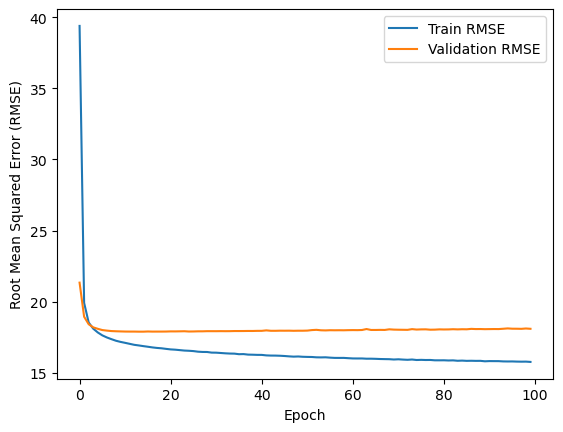

In [99]:
# Obtener historial de pérdida del modelo
loss_history = history.history['loss']
val_loss_history = history.history['val_loss']

# Calcular el RMSE correspondiente a la pérdida
rmse_history = [np.sqrt(loss) for loss in loss_history]
val_rmse_history = [np.sqrt(val_loss) for val_loss in val_loss_history]

# Graficar el RMSE
plt.plot(rmse_history, label='Train RMSE')
plt.plot(val_rmse_history, label='Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.legend()
plt.show()

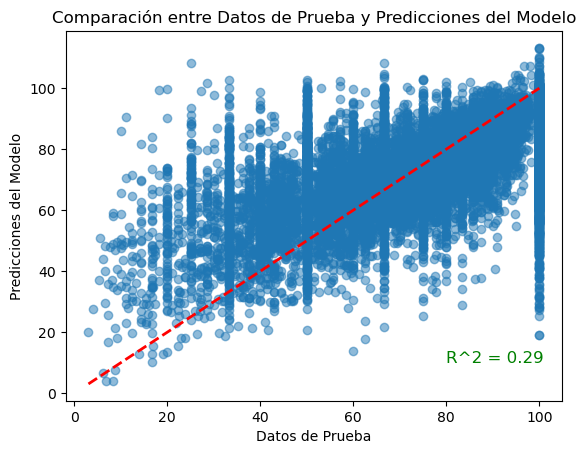

In [81]:
# Crear un gráfico de dispersión para comparar datos de prueba y predicciones
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Datos de Prueba')
plt.ylabel('Predicciones del Modelo')
plt.title('Comparación entre Datos de Prueba y Predicciones del Modelo')
# Línea de referencia para una predicción perfecta (y_test = y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
# Agregar texto con el valor de R^2
plt.text(0.8 * max(y_test), 0.1 * max(y_test), f'R^2 = {rfr_r2:.2f}', fontsize=12, color='green')
plt.show()




## Elección de Hiperparámetos para redes

In [100]:


# Función auxiliar para crear el modelo
def create_model(architecture=32, optimizer='adam'):
    model = Sequential()
    for _ in range(architecture):
        model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Datos de entrenamiento y prueba 
X_train = np.random.rand(100, 10)
y_train = np.random.rand(100)
X_test = np.random.rand(20, 10)
y_test = np.random.rand(20)

# Definir la cuadrícula de hiperparámetros para la búsqueda
param_grid = {
    'architecture': [32, 64, 128],
    'optimizer': ['adam', 'sgd']
}

best_params = None
best_model = None
best_score = np.inf  # Inicializar con un valor grande

# Búsqueda de hiperparámetros
for params in ParameterGrid(param_grid):
    model = create_model(**params)
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    if mse < best_score:
        best_score = mse
        best_params = params
        best_model = model

# Imprimir los mejores hiperparámetros encontrados
print("Mejores Hiperparámetros:", best_params)

# Evaluar el rendimiento del modelo con los mejores hiperparámetros
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R^2 Score: {r2}')

1/1 [==============================] - 2s 2s/step
Mejores Hiperparámetros: {'architecture': 128, 'optimizer': 'adam'}
1/1 [==============================] - 0s 56ms/step
Mean Squared Error (MSE): 0.08168585969113483
R^2 Score: -0.2336072883204261
